In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = "C:\\Users\\dongh\\Downloads\\MBD project\\"

In [3]:
listc = ["Time","Alberta","British Columbia","Manitoba","Nova Scotia","Ontario","Quebec"]
lista = ["California","Colorado","Florida","Georgia","Hawaii","Illinois","Massachusetts"
         ,"Michigan","North Carolina","New Jersey","Nevada","New York","Texas","Virginia","Washington"]

In [4]:
us = pd.read_csv(data_dir + "US-bystate.csv")
us.columns.values[0] = "Index"
us = us.set_index("Index")
us = us.transpose()
us = us.reset_index()
Others = pd.read_csv(data_dir + "Others.csv")
impact = pd.read_csv(data_dir + "irport_traffic.csv")
canada = Others.loc[:,listc]

In [5]:
list = us.columns.values
list[0] = "Time"
us.columns = list
us.head()

,Time,New York,California,Florida,Hawaii,Nevada,Massachusetts,Texas,Illinois,New Jersey,Washington,Georgia,Virginia,Colorado,North Carolina,Michigan
0,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/26/2020,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/27/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
canada.head()

,Time,Alberta,British Columbia,Manitoba,Nova Scotia,Ontario,Quebec
0,1/23/2020,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0
3,1/26/2020,0,0,0,0,1,0
4,1/27/2020,0,0,0,0,0,0


In [7]:
impact.head()

,Date,PercentOfBaseline,State
0,3/16/2020,92,New South Wales
1,3/16/2020,96,Santiago Province
2,3/16/2020,100,Alberta
3,3/16/2020,63,Alberta
4,3/16/2020,100,British Columbia


In [8]:
cali_inf = us.loc[:,["Time","New York"]]
cali_inf = cali_inf.reset_index()
cali_inf = cali_inf.drop("index",axis=1)
cali_inf.head()

,Time,New York
0,1/23/2020,0
1,1/24/2020,0
2,1/25/2020,0
3,1/26/2020,0
4,1/27/2020,0


In [9]:
cali_imp = impact.loc[impact.State == "New York",:]
cali_imp = cali_imp.reset_index()
cali_imp = cali_imp.drop("index",axis=1)
cali_imp.head()

,Date,PercentOfBaseline,State
0,3/16/2020,95,New York
1,3/16/2020,70,New York
2,3/17/2020,88,New York
3,3/17/2020,65,New York
4,3/18/2020,78,New York


In [10]:
index1 = cali_inf["Time"].values.tolist()
index1 = index1.index("3/16/2020")
index2 = cali_inf["Time"].values.tolist()
index2 = index2.index("10/17/2020")
cali_inf = cali_inf.iloc[index1:index2,:]
cali_inf.shape

(215, 2)

In [11]:
cali_imp = cali_imp.drop("State",axis=1)
cali_imp.head()

,Date,PercentOfBaseline
0,3/16/2020,95
1,3/16/2020,70
2,3/17/2020,88
3,3/17/2020,65
4,3/18/2020,78


In [12]:
cali_imp = cali_imp.groupby("Date").mean()
cali_imp = cali_imp.reset_index()
cali_imp

,Date,PercentOfBaseline
0,10/1/2020,78.5
1,10/10/2020,79.0
2,10/11/2020,62.5
3,10/12/2020,42.5
4,10/13/2020,76.0
...,...,...
210,9/5/2020,62.5
211,9/6/2020,71.5
212,9/7/2020,29.5
213,9/8/2020,56.5


In [43]:
cali_inf.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\ny_inf.csv", index=False, header=True)
cali_imp.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\ny_imp.csv", index=False, header=True)

In [80]:
cali = pd.read_csv(data_dir + "ny.csv")
cali.head()

,Time,New York,PercentOfBaseline
0,3/16/2020,328,82.5
1,3/17/2020,446,76.5
2,3/18/2020,1100,71.0
3,3/19/2020,1714,63.5
4,3/20/2020,3439,62.5


In [81]:
N = 5
cali = cali.groupby(cali.index // N).mean()

In [82]:
cali = cali.reset_index()
cali["change"] = 0
for i in range(len(cali)):
    if i == 0:
        continue
    else:
        cali.iloc[i,3] = (cali.iloc[i,1] - cali.iloc[i-1,1])/cali.iloc[i-1,1]

In [83]:
cali = cali.iloc[1:,:]
cali.head()

,index,New York,PercentOfBaseline,change
1,1,4636.2,62.9,2.298847
2,2,7164.4,56.2,0.545317
3,3,9434.0,53.1,0.316789
4,4,9589.2,52.0,0.016451
5,5,8248.2,51.0,-0.139845


In [84]:
N = 3
tmp1 = pd.DataFrame(cali.PercentOfBaseline[:20])
tmp1["change"] = cali.iloc[(N):(20+N),3].tolist()

In [85]:
cali = tmp1[:]
cali.head()

,PercentOfBaseline,change
1,62.9,0.016451
2,56.2,-0.139845
3,53.1,-0.017216
4,52.0,-0.308209
5,51.0,0.002211


In [86]:
cali.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\ny2.csv", index=False, header=True)

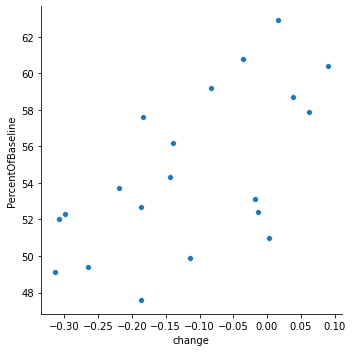

In [87]:
sns.relplot("change","PercentOfBaseline",data = tmp1)

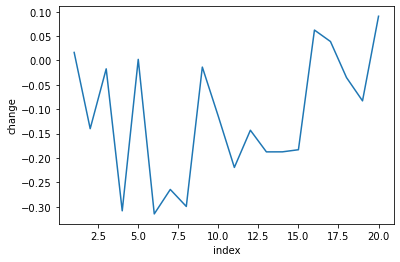

In [88]:
cali = cali.reset_index()
sns.lineplot("index","change",data = cali)

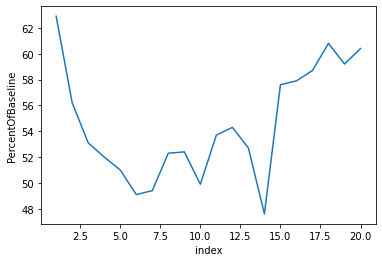

In [89]:
sns.lineplot("index","PercentOfBaseline",data = cali)

In [90]:
from statsmodels.api import OLS
OLS(cali.change,cali.PercentOfBaseline).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 change   R-squared (uncentered):                   0.406
Model:                            OLS   Adj. R-squared (uncentered):              0.374
Method:                 Least Squares   F-statistic:                              12.97
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                     0.00190
Time:                        01:04:46   Log-Likelihood:                          12.215
No. Observations:                  20   AIC:                                     -22.43
Df Residuals:                      19   BIC:                                     -21.44
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
PercentOfBaseline    -0.0020      0.001     -3.601      0.002      -0.003      -0.001
==============================================================================
Omnibus:                        3.013   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                1.239
Skew:                          -0.056   Prob(JB):                        0.538
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""